In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import tree
import sklearn 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
df=pd.read_csv('D:\DATA SCIENCE\Python\IITG\week6 kaggle\summeranalytics2020/train.csv')
df

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1624,42,1,Travel_Frequently,Research & Development,19,3,Medical,752,3,...,3,0,7,2,2,2,2,2,3,1
1624,1625,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
1625,1626,25,1,Travel_Rarely,Sales,9,2,Life Sciences,1439,1,...,3,0,6,2,3,2,2,2,5,1
1626,1627,29,1,Travel_Rarely,Human Resources,13,3,Human Resources,1844,1,...,3,3,4,3,2,2,2,0,5,1


In [4]:
#One hot encoding

from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
df['BusinessTravel'] = labelencoder.fit_transform(df['BusinessTravel'])
df['Department'] = labelencoder.fit_transform(df['Department'])
df['EducationField'] = labelencoder.fit_transform(df['EducationField'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['JobRole'] = labelencoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = labelencoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = labelencoder.fit_transform(df['OverTime'])
(df['Attrition'].value_counts()/1628)*100

0    51.781327
1    48.218673
Name: Attrition, dtype: float64

In [5]:
data_n=df[['Age','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked']]

In [6]:
data_n

,Age,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked
0,30,2564,14,12,11,7,6,7,0
1,36,4663,12,7,3,2,1,1,9
2,55,5160,16,12,9,7,7,3,4
3,39,4108,13,18,7,7,1,7,7
4,37,9434,15,10,10,7,7,8,1
...,...,...,...,...,...,...,...,...,...
1623,42,2759,12,7,2,2,2,2,6
1624,55,5160,16,12,9,7,7,3,4
1625,25,4400,12,6,3,2,2,2,3
1626,29,2335,15,4,2,2,2,0,4


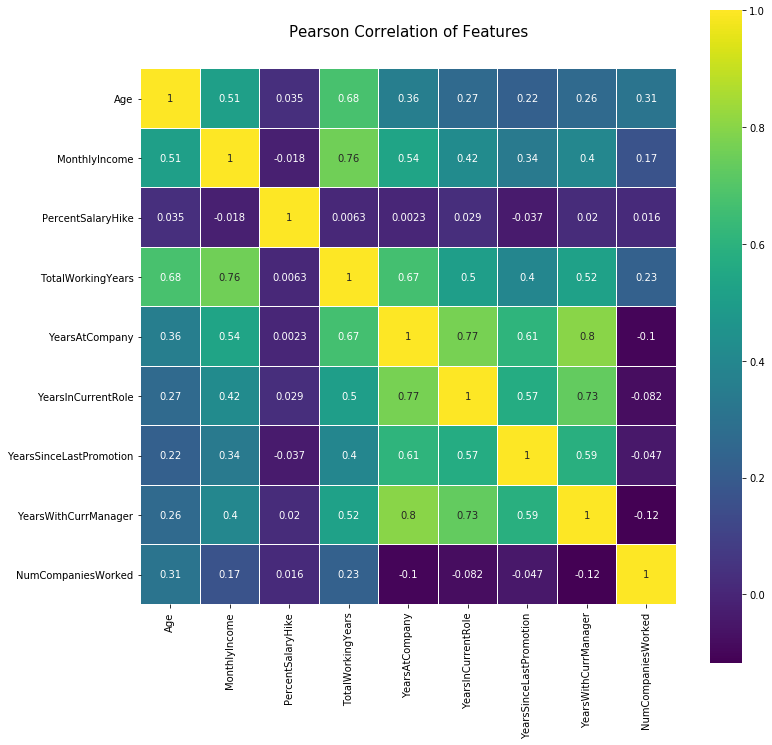

In [7]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_n.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
y=df['Attrition']
x=df.drop(df.columns[1], axis = 1)

In [8]:
r_state=52
avg_scores = []
parameter_values = np.arange(0,1, 0.01)
for mid in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state
                                            , min_impurity_decrease = mid
                                            )
    scores = cross_val_score(estimator, x, y, scoring='accuracy', cv = 10)
    avg_scores.append(np.mean(scores))
mid_opt = np.argmax(avg_scores)
print("The optimal value of 'min_impurity_decrease' is {0:.2f}".format(parameter_values[mid_opt])+
      " giving accuracy {0:.2f}".format(avg_scores[mid_opt]))
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state
                                       , min_impurity_decrease = 0.007
                                       )
model=estimator.fit(x,y)
y_pred = estimator.predict(x)
accuracy_full = np.mean(y == y_pred) * 100
print("The accuracy on full training set is {0:.1f}%".format(accuracy_full))

The optimal value of 'min_impurity_decrease' is 0.00 giving accuracy 1.00
The accuracy on full training set is 100.0%


In [9]:
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
# Feature Extraction with RFE

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print("Num Features: "+str(fit.n_features_))
print("Selected Features: "+str(fit.support_))
print("Feature Ranking: "+str(fit.ranking_))

Num Features: 3
Selected Features: [False  True False False False False False False False False False False
 False  True False False  True False False False False False False False
 False False False False]
Feature Ranking: [24  1 15 22 21 18 10 25  4 12  2 11  3  1 26 13  1 23 19  5 14  8 17  7
  9 16  6 20]


28
['attrition', 'behaviour', 'businesstravel', 'communicationskill', 'department', 'distancefromhome', 'education', 'educationfield', 'employeenumber', 'environmentsatisfaction', 'gender', 'id', 'jobinvolvement', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'numcompaniesworked', 'overtime', 'percentsalaryhike', 'performancerating', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']


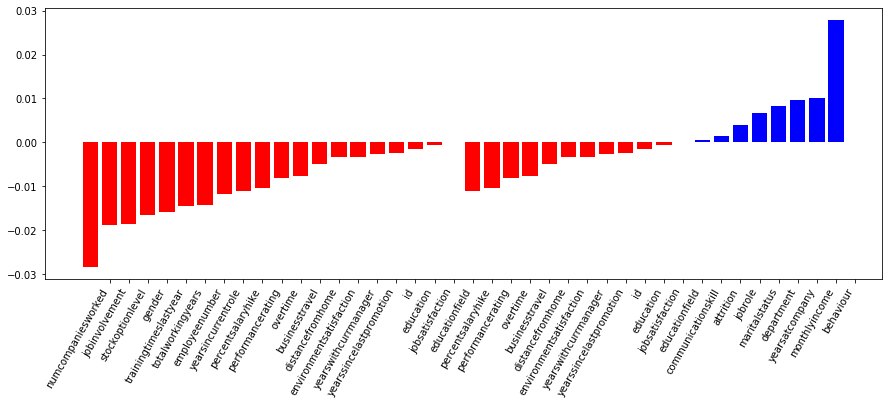

In [10]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
cv = CountVectorizer()
cv.fit(x)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
svm = LinearSVC()
svm.fit(x, y)
plot_coefficients(svm, cv.get_feature_names())

In [11]:
train, test = sklearn.model_selection.train_test_split(df, train_size = 0.75,random_state=r_state)
train, val = sklearn.model_selection.train_test_split(train, train_size = 0.75,random_state=r_state)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Validation Set :",val['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

For Main Data Set : 1628
For Train Set : 915
For Validation Set : 306
For Test Set : 407


In [13]:
x_train=train.drop(train.columns[1], axis = 1)
x_val=val.drop(val.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_val=val['Attrition']
y_test=test['Attrition']

Acc Train: 0.860109, Acc Val:0.803922
Acc Train: 0.864481, Acc Val:0.800654
Acc Train: 0.891803, Acc Val:0.836601
Acc Train: 0.906011, Acc Val:0.872549
Acc Train: 0.978142, Acc Val:0.970588
Acc Train: 0.990164, Acc Val:0.986928
Acc Train: 0.998907, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000


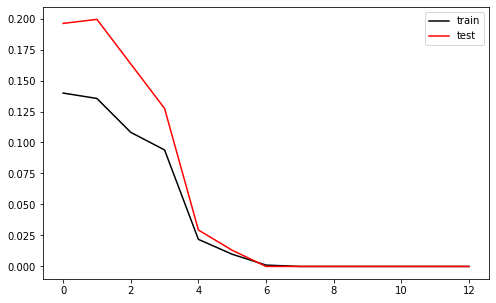

In [14]:
C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]
prediction_error = []
train_error = []
for C_val in C_values:
    clf = LogisticRegression(C=C_val,max_iter=10000,random_state=52)
    clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_val,y_val)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    #val_error.append(1-score_val) 
    print("Acc Train: %f, Acc Val:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=10,max_iter=750,random_state=52)
logreg.fit(x_train, y_train)
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=52)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.862


In [16]:
logreg = LogisticRegression(random_state=52,C=10)
logreg.fit(x_train, y_train)
logreg = LogisticRegression(random_state=52,C=10)
logreg.fit(x_train, y_train)
start_time = time.time()
model=logreg
pred=model.predict(x_test)

In [17]:
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True         0    1
Predicted          
0          193   35
1           17  162


In [18]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       210
           1       0.91      0.82      0.86       197

    accuracy                           0.87       407
   macro avg       0.88      0.87      0.87       407
weighted avg       0.87      0.87      0.87       407



In [19]:
print(model.score(x_test,y_test))

0.8722358722358723


In [20]:
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))
fpr, tpr, _ = roc_curve(y_test, pred)

Duration: --- 0.30468244552612306 Minutes ---


In [21]:
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)

ROC AUC: 0.87


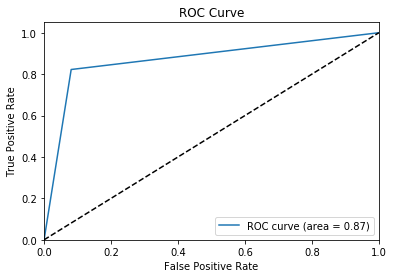

In [22]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)

0.7434853222795919

In [24]:
dm=pd.read_csv('D:\DATA SCIENCE\Python\IITG\week6 kaggle\summeranalytics2020/test.csv')
dm

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,32,Travel_Rarely,Research & Development,2,4,Life Sciences,1692,4,Male,...,3,0,1,2,1,0,0,0,5,1
466,467,18,Travel_Frequently,Sales,3,2,Medical,1624,2,Female,...,3,0,0,2,0,0,0,0,2,1
467,468,24,Travel_Rarely,Research & Development,23,3,Medical,639,2,Male,...,3,2,6,3,6,5,1,4,1,1
468,469,31,Travel_Rarely,Research & Development,23,3,Medical,367,2,Male,...,4,1,10,2,9,0,7,8,3,1


In [25]:
dm['BusinessTravel'] = labelencoder.fit_transform(dm['BusinessTravel'])
dm['Department'] = labelencoder.fit_transform(dm['Department'])
dm['EducationField'] = labelencoder.fit_transform(dm['EducationField'])
dm['Gender'] = labelencoder.fit_transform(dm['Gender'])
dm['JobRole'] = labelencoder.fit_transform(dm['JobRole'])
dm['MaritalStatus'] = labelencoder.fit_transform(dm['MaritalStatus'])
dm['OverTime'] = labelencoder.fit_transform(dm['OverTime'])

In [28]:
x_test=dm
y_train=df['Attrition']
x_train=df.drop('Attrition',axis = 1)

In [29]:
 Lr=LogisticRegression(solver='lbfgs',max_iter=5000,C=0.5,penalty='l2',random_state=1)
Lr.fit(x_train,y_train)
a=Lr.predict_proba(x_test)

In [34]:
b=a[:,1]
c=pd.DataFrame(b)
c

,0
0,0.006903
1,0.002060
2,0.024957
3,0.034192
4,0.001407
...,...
465,0.211302
466,0.628276
467,0.114007
468,0.320174


In [35]:
ss=pd.read_csv('D:\DATA SCIENCE\Python\IITG\week6 kaggle\summeranalytics2020/Sample_submission.csv')
ss

,Id,Attrition
0,1,0.742476
1,2,0.347438
2,3,0.938753
3,4,0.456471
4,5,0.363193
...,...,...
465,466,0.559383
466,467,0.250594
467,468,0.221861
468,469,0.329073


In [37]:
ss=ss.drop('Attrition',axis=1)
ss['Attrition']=b
ss

,Id,Attrition
0,1,0.006903
1,2,0.002060
2,3,0.024957
3,4,0.034192
4,5,0.001407
...,...,...
465,466,0.211302
466,467,0.628276
467,468,0.114007
468,469,0.320174


In [41]:
ss.to_csv('D:\DATA SCIENCE\Python\IITG\week6 kaggle\summeranalytics2020/Submission_kaggle.csv',index=False)